In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)

x_inliers = np.random.normal(70,3,(100,2))

x_inliers = np.r_[x_inliers + 10 , x_inliers - 10]

print(x_inliers.shape)
print(x_inliers[:3,:2])


(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [3]:
x_outliers = np.random.uniform(low=15,high=130,size=(20,2))

In [5]:
X = np.r_[x_inliers,x_outliers]

In [6]:
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [10]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [11]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [12]:
X_score = LOF.negative_outlier_factor_

In [13]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [14]:
X_score.std()

2.140119050235338

In [15]:
X_score.mean()

-1.6850227435158005

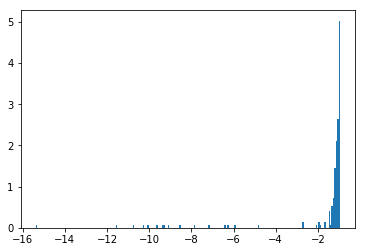

In [17]:
plt.hist(X_score,bins = "auto",density = True)
plt.show()

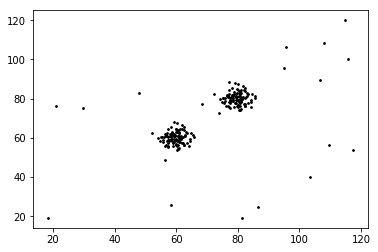

In [19]:
plt.scatter(X[:,0],X[:,1], color = "k", s = 3, label= "Gözlem birimleri");

In [20]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

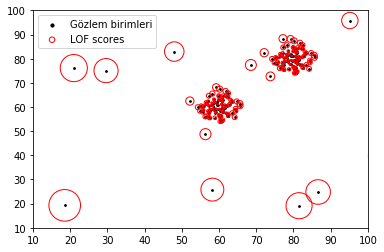

In [23]:
plt.scatter(X[:,0],X[:,1], color = "k", s = 3, label= "Gözlem birimleri");
plt.scatter(X[:,0],X[:,1], s=1000 * radius,edgecolors="r",
           facecolors="none",label="LOF scores")

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]